#Install dependencies

In [0]:
%pip install azure-storage-blob

%pip install pdfplumber

!python -m spacy download en_core_web_sm

%pip install prettytable

%pip install tiktoken


Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.
  Obtaining dependency information for pdfplumber from https://files.pythonhosted.org/packages/e6/c4/d2e09fbc937d1f76baae34e526662cc718e23a904321bf4a40282d190033/pdfplumber-0.11.6-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/42.8 kB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 3.9 MB/s eta 0:00:00
  Obtaining dependency information for pdfminer.six==20250327 from https://files.pythonhosted.org/packages/29/2f/409e174b5a0195aa6a814c7359a1285f1c887a4c84aff17ed03f607c06ba/pdfminer_six-20250327-py3-none-any.whl.metadata
  Obtaining dependency information for pypdfium2>=4.18.0 from https://files.pythonhosted.org/packages/be/d9/a2f1ee03d47fbeb48bcfde47ed7155772739622cfadf7135a84ba6a97824/pypdfium2-4.30.1-py3-none-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

#Azure blob connecting and fetching files

In [0]:
dbutils.library.restartPython()

In [0]:
from pyspark.sql.functions import *

# Base path for PDF files
base_path = "PRIVATE"

# This mapping ensures file1, file2, etc. match exactly with the original Azure implementation
# The keys are the original file variables, and the values are the document IDs
file_to_doc_id = {
    "file1": "MCE0110B",
    "file2": "MCE0107B",
    "file3": "MCE1157E",
    "file4": "MCG1093J",
    "file5": "MCG1107B",
    "file6": "MCG1202A",
    "file7": "MCH1744H",
    "file8": "MCH1759F",
    "file9": "MCH1798H", 
    "file10": "MCH2629A",
    "file11": "MCE2241F",
    "file12": "MCE2246A",
    "file13": "MCG1090D",
    "file14": "MCG1094C",
    "file15": "MCG1101A",
    "file16": "MCH0018B04",
    "file17": "MCH1647E",
    "file18": "MCH1734A",
    "file19": "MCH1948B",
    "file20": "MCH2475C"
}

# Define the path for each document based on the listing
doc_to_path = {
    "MCE0110B": f"dbfs:{base_path}/MCE0110B.pdf",
    "MCE0107B": f"dbfs:{base_path}/MCE0107B (1).pdf",  # Note the (1) in filename
    "MCE1157E": f"dbfs:{base_path}/MCE1157E.pdf",
    "MCG1093J": f"dbfs:{base_path}/MCG1093J.pdf",
    "MCG1107B": f"dbfs:{base_path}/MCG1107B.pdf",
    "MCG1202A": f"dbfs:{base_path}/MCG1202A.pdf",
    "MCH1744H": f"dbfs:{base_path}/MCH1744H.pdf",
    "MCH1759F": f"dbfs:{base_path}/MCH1759F.pdf",
    "MCH1798H": f"dbfs:{base_path}/MCH1798H.pdf",
    "MCH2629A": f"dbfs:{base_path}/MCH2629A.pdf",
    "MCE2241F": f"dbfs:{base_path}/MCE2241F.pdf",
    "MCE2246A": f"dbfs:{base_path}/MCE2246A.pdf",
    "MCG1090D": f"dbfs:{base_path}/MCG1090D.pdf",
    "MCG1094C": f"dbfs:{base_path}/MCG1094C.pdf",
    "MCG1101A": f"dbfs:{base_path}/MCG1101A.pdf",
    "MCH0018B04": f"dbfs:{base_path}/MCH0018B04.pdf",
    "MCH1647E": f"dbfs:{base_path}/MCH1647E.pdf",
    "MCH1734A": f"dbfs:{base_path}/MCH1734A.pdf",
    "MCH1948B": f"dbfs:{base_path}/MCH1948B.pdf",
    "MCH2475C": f"dbfs:{base_path}/MCH2475C.pdf"
}

# Define file variables to match the original Azure implementation
file1 = doc_to_path[file_to_doc_id["file1"]]
file2 = doc_to_path[file_to_doc_id["file2"]]
file3 = doc_to_path[file_to_doc_id["file3"]]
file4 = doc_to_path[file_to_doc_id["file4"]]
file5 = doc_to_path[file_to_doc_id["file5"]]
file6 = doc_to_path[file_to_doc_id["file6"]]
file7 = doc_to_path[file_to_doc_id["file7"]]
file8 = doc_to_path[file_to_doc_id["file8"]]
file9 = doc_to_path[file_to_doc_id["file9"]]
file10 = doc_to_path[file_to_doc_id["file10"]]
file11 = doc_to_path[file_to_doc_id["file11"]]
file12 = doc_to_path[file_to_doc_id["file12"]]
file13 = doc_to_path[file_to_doc_id["file13"]]
file14 = doc_to_path[file_to_doc_id["file14"]]
file15 = doc_to_path[file_to_doc_id["file15"]]
file16 = doc_to_path[file_to_doc_id["file16"]]
file17 = doc_to_path[file_to_doc_id["file17"]]
file18 = doc_to_path[file_to_doc_id["file18"]]
file19 = doc_to_path[file_to_doc_id["file19"]]
file20 = doc_to_path[file_to_doc_id["file20"]]

# Verify that all file variables are assigned correctly
print("File paths assigned:")
for i in range(1, 21):
    var_name = f"file{i}"
    doc_id = file_to_doc_id[var_name]
    print(f"  {var_name}: {doc_id} -> {globals()[var_name]}")

# Read the binary content of the first file (replicating original behavior)
print(f"\nLoading first PDF from: {file1}")
pdf_df = spark.read.format("binaryFile").load(file1).cache()
display(pdf_df)

###NLP Pattern Creation


In [0]:
'''USEFUL LINKS
https://www.babelstreet.com/blog/what-is-entity-extraction#:~:text=Entity%20extraction%20(aka%2C%20named%20entity,%2C%20webpages%2C%20text%20fields).

https://medium.com/@sanskrutikhedkar09/mastering-information-extraction-from-unstructured-text-a-deep-dive-into-named-entity-recognition-4aa2f664a453

https://www.microfocus.com/documentation/relativity/relativity1217/reldbdsn/GUID-7C2DF185-41A1-4448-81E7-3252AA8DEBB3.html 

'''

import spacy
from spacy.pipeline import EntityRuler
import re
from typing import List, Dict, Any

def create_nlp_pipeline():
    nlp = spacy.load("en_core_web_sm")
    ruler = nlp.add_pipe("entity_ruler", before="ner")
    
    patterns = [
        {"label": "TECH_DOC", "pattern": [
        {"LOWER": {"IN": ["mce", "mch", "mcx", "mcg", "tr"]}},
        {"TEXT": {"REGEX": r"^\d{4}$"}},
        {"LOWER": {"IN": [":"]}},
    ]},
    #pattern 1 mce0107b or mce0107
    {"label": "TECH_DOC", "pattern": [
        {"LOWER": {"REGEX": r"^(mce|mch|mcx|mcg|tr|mcs|oa|og|os|pa|pt|pl|re|rg|se|trg|trh)\d{4}[a-z]?$"}}
    ]},

    #pattern 2 MCE 0107B or MCE 0107
    {"label": "TECH_DOC", "pattern": [
        {"LOWER": {"IN": ["mce", "mch", "mcx", "mcg", "tr", "mcs", "oa", "og", "os", "pa", "pt", "pl", "re", "rg", "se", "trg", "trh"]}},
        {"TEXT": {"REGEX": r"^\d{4}[A-Za-z]?$"}}
    ]},

    #pattern 3 mce 0107 b
    {"label": "TECH_DOC", "pattern": [
        {"LOWER": {"IN": ["mce", "mch", "mcx", "mcg", "tr", "mcs", "oa", "og", "os", "pa", "pt", "pl", "re", "rg", "se", "trg", "trh"]}},
        {"TEXT": {"REGEX": r"^\d{4}$"}},
        {"LOWER": {"REGEX": r"^[a-z]$"}},
        
    ]},

            {"label": "TECH_DOC", "pattern": [
        {"LOWER": {"IN": ["mce", "mch", "mcx", "mcg", "tr", "mcs", "oa", "og", "os", "pa", "pt", "pl", "re", "rg", "se", "trg", "trh"]}},
        {"TEXT": {"REGEX": r"^\d{4}(?=\\)"}}  # Matches only the 4 digits when followed by backslash
    ]},

    
    # SYSTEM_COMPONENT Patterns
    {"label": "SYSTEM_COMPONENT", "pattern": [
        {"LOWER": {"REGEX": r"^(midas|nmcs2?|hadecs|hatms)$"}}
    ]},
    
    {"label": "SYSTEM_COMPONENT", "pattern": [
        {"LOWER": "midas"}, 
        {"LOWER": "gold"}
    ]},
    
    # HARDWARE_COMPONENT Patterns
    {"label": "HARDWARE_COMPONENT", "pattern": [
        {"LOWER": {"REGEX": r"^(cabinet|plinth|lantern|post|frame|skirt)$"}}, 
        {"LOWER": "type"}, 
        {"TEXT": {"REGEX": r"^\d+[a-z]?$"}}
    ]},
    
    {"label": "HARDWARE_COMPONENT", "pattern": [
        {"LOWER": {"REGEX": r"^(ms[1-4]r?|ami|ert)$"}}
    ]},
    
    {"label": "HARDWARE_COMPONENT", "pattern": [
        {"LOWER": {"IN": ["indicator", "signal", "sensor", "detector", "camera", "telephone"]}}
    ]},
    
    # COMMUNICATION_COMPONENT Patterns
    {"label": "COMMUNICATION_COMPONENT", "pattern": [
        {"LOWER": {"REGEX": r"^(rs485|rs422|tcp\/ip|lan|wan)$"}}
    ]},
    
    {"label": "COMMUNICATION_COMPONENT", "pattern": [
        {"LOWER": "rs"}, 
        {"TEXT": {"REGEX": r"^(485|422)$"}}
    ]},
    
    {"label": "COMMUNICATION_COMPONENT", "pattern": [
        {"LOWER": "ethernet"}, 
        {"LOWER": {"IN": ["lan", "connection", "interface"]}}
    ]},
    
    # SUBSYSTEM_COMPONENT Patterns
    {"label": "SUBSYSTEM_COMPONENT", "pattern": [
        {"LOWER": {"IN": ["signal", "message", "meteorological", "tidal", "tunnel"]}}, 
        {"LOWER": "subsystem"}
    ]},
    
    {"label": "SUBSYSTEM_COMPONENT", "pattern": [
        {"LOWER": {"REGEX": r"^(lcc|pdu|cobs|ceclb|ceceb|cecr)$"}}
    ]},
    
    # CONTROL_COMPONENT Patterns
    {"label": "CONTROL_COMPONENT", "pattern": [
        {"LOWER": {"IN": ["control", "monitoring", "outstation", "instation"]}}, 
        {"LOWER": {"IN": ["system", "unit", "equipment", "interface"]}}
    ]},
    
    {"label": "CONTROL_COMPONENT", "pattern": [
        {"LOWER": "cctv"}, 
        {"LOWER": {"IN": ["system", "camera", "equipment"]}}
    ]},
    
    # SPECIFICATION_TYPE Patterns
    {"label": "SPECIFICATION_TYPE", "pattern": [
        {"LOWER": {"IN": ["requirements", "specification", "instructions", "overview", "process"]}}, 
        {"LOWER": "document"}
    ]},
    
    {"label": "SPECIFICATION_TYPE", "pattern": [
        {"LOWER": "technical"}, 
        {"LOWER": "requirements"}
    ]}
]
    
    ruler.add_patterns(patterns)
    return nlp

##Preprocessing text

In [0]:
import pdfplumber
from io import BytesIO
import logging

def extract_text(binary_data):

  logging.getLogger('pdfminer').setLevel(logging.ERROR) 

  pdf_file = BytesIO(binary_data)

  with pdfplumber.open(pdf_file) as pdf:
    plain_text = ""

    for page in pdf.pages:
      plain_text += page.extract_text()

    return plain_text


In [0]:
binary_pdf = pdf_df.select("content").collect()[0]["content"] 

extracted_text = extract_text(binary_pdf) 

###Chunking and cleaning methods

In [0]:
nlp = create_nlp_pipeline()

In [0]:
import re

def get_chunks(text: str, max_tokens: int = 500) -> List[str]:
    """
    Split text into chunks while preserving document structure and page breaks.
    Specifically handles page indicators that contain document references.
    
    Args:
        text: Input text to split
        max_tokens: Approximate maximum tokens per chunk
    
    Returns:
        List of text chunks 
    """
    import tiktoken
    import re
    
    encoding = tiktoken.get_encoding("cl100k_base")
    
    header_patterns = [
        r'^#+\s+.+$',                      # Markdown headers
        r'^[A-Z0-9][.)\s]+[A-Z].*$',       # Numbered sections like "1. INTRODUCTION"
        r'^[IVXLCDMivxlcdm]+\.\s+.+$',     # Roman numeral sections
        r'^Section\s+\d+[.:]\s+.+$',       # Explicit section markers
        r'^\d+\.\d+\s+.+$'                 # Decimal numbering like "1.2 Configuration"
    ]
    
    # Pattern for page indicators that might contain document references
    page_patterns = [
        r'.*page\s+\d+.*',                 # "page X" indicators
        r'.*\b(mce|mch|mcx|mcg|tr|mcs|oa|og|os|pa|pt|pl|re|rg|se|trg|trh)\s*\d{4}[a-z]?\b.*\bpage\b', # Doc ref + page
        r'.*\d+\s*of\s*\d+\s*$'            # "X of Y" page counters
    ]
    
    # Identify structural elements
    lines = text.split('\n')
    structure = []
    current_section = []
    current_tokens = 0
    
    for i, line in enumerate(lines):
        if not line.strip():  # Empty line
            if current_section:
                current_section.append(line)
            continue
        
        # Check if this is a page indicator
        is_page_indicator = any(re.match(pattern, line.lower(), re.MULTILINE) for pattern in page_patterns)
        
        # If it's a page indicator, add a space before and after
        if is_page_indicator:
            # If not the first line, add space before
            if i > 0 and current_section:
                if not current_section[-1].endswith(' ') and not current_section[-1].endswith('\n'):
                    current_section[-1] += ' '
            
            # Add the page indicator with space after
            current_section.append(line + ' ')
            current_tokens += len(encoding.encode(line + ' '))
            
            # Force a section break after page indicators
            if current_section:
                structure.append('\n'.join(current_section))
                current_section = []
                current_tokens = 0
            continue
            
        line_tokens = len(encoding.encode(line))
        
        # Check if this is a header
        is_header = any(re.match(pattern, line.strip(), re.MULTILINE) for pattern in header_patterns)
        
        # If header or we'd exceed token limit, start new section
        if is_header or (current_tokens + line_tokens > max_tokens and current_section):
            if current_section:
                structure.append('\n'.join(current_section))
                current_section = []
                current_tokens = 0
        
        # Add line to current section
        current_section.append(line)
        current_tokens += line_tokens
        
        # If we're at token limit, break section
        if current_tokens >= max_tokens:
            structure.append('\n'.join(current_section))
            current_section = []
            current_tokens = 0
    
    # Add any remaining content
    if current_section:
        structure.append('\n'.join(current_section))
    
    # Merge small chunks but respect page breaks
    merged_structure = []
    current_chunk = ""
    current_chunk_tokens = 0
    
    for section in structure:
        # Check if this section contains a page indicator
        contains_page_indicator = any(re.search(pattern, section.lower()) for pattern in page_patterns)
        
        section_tokens = len(encoding.encode(section))
        
        # Don't merge if this contains a page indicator or previous chunk ends with one
        if contains_page_indicator or any(re.search(pattern, current_chunk.lower()) for pattern in page_patterns):
            # Add previous chunk if it exists
            if current_chunk:
                merged_structure.append(current_chunk)
            
            # Start new chunk with this section
            current_chunk = section
            current_chunk_tokens = section_tokens
        # Otherwise check if it can be merged
        elif section_tokens < max_tokens * 0.25 and current_chunk_tokens + section_tokens <= max_tokens:
            current_chunk += "\n\n" + section if current_chunk else section
            current_chunk_tokens += section_tokens
        else:
            # Add previous chunk if it exists
            if current_chunk:
                merged_structure.append(current_chunk)
            
            # Start new chunk with this section
            current_chunk = section
            current_chunk_tokens = section_tokens
    
    # Add final chunk
    if current_chunk:
        merged_structure.append(current_chunk)
    
    return merged_structure

def get_chunks2(text: str, max_tokens: int = 300, similarity_threshold: float = 0.7) -> List[str]:
    """
    Split text into chunks based on semantic similarity, keeping related content together.
    
    Args:
        text: Input text to split (must be a string, not a list)
        max_tokens: Maximum tokens per chunk
        similarity_threshold: Threshold for considering paragraphs semantically related
        
    Returns:
        List of semantically coherent text chunks
    """
    try:
        import tiktoken
        import numpy as np
        from sklearn.feature_extraction.text import TfidfVectorizer
        from sklearn.metrics.pairwise import cosine_similarity
        import re
        
        # Ensure input is a string
        if isinstance(text, list):
            text = " ".join(text)
            
        # Initialize tokenizer
        encoding = tiktoken.get_encoding("cl100k_base")
        
        # Split text into paragraphs
        paragraphs = [p for p in re.split(r'\n\s*\n', text) if p.strip()]
        
        # Handle empty input
        if not paragraphs:
            return []
            
        # Calculate token counts for each paragraph
        paragraph_tokens = [len(encoding.encode(p)) for p in paragraphs]
        
        # Compute semantic similarity between paragraphs
        vectorizer = TfidfVectorizer(stop_words='english')
        
        # Handle case when there's only one paragraph
        if len(paragraphs) == 1:
            return paragraphs
            
        # Compute TF-IDF matrix for paragraphs
        tfidf_matrix = vectorizer.fit_transform(paragraphs)
        
        # Compute cosine similarity matrix from TF-IDF matrix
        similarity_matrix = cosine_similarity(tfidf_matrix)
        
        # Cluster paragraphs by semantic similarity
        clusters = []
        visited = set()
        
        for i in range(len(paragraphs)):
            if i in visited:
                continue
                
            # Start a new cluster
            cluster = [i]
            visited.add(i)
            
            # Find semantically similar paragraphs
            for j in range(len(paragraphs)):
                if j in visited:
                    continue
                    
                # Check if semantically similar to any paragraph in current cluster
                if any(similarity_matrix[k, j] >= similarity_threshold for k in cluster):
                    cluster.append(j)
                    visited.add(j)
            
            clusters.append(sorted(cluster))
        
        # Create chunks based on clusters while respecting token limits
        chunks = []
        for cluster in clusters:
            cluster_paragraphs = [paragraphs[i] for i in cluster]
            cluster_tokens = [paragraph_tokens[i] for i in cluster]
            
            # If cluster is too big, split it by semantic distance
            if sum(cluster_tokens) > max_tokens:
                # Sort paragraphs by semantic distance to the first paragraph
                first_idx = cluster[0]
                sorted_by_similarity = sorted(
                    cluster,
                    key=lambda idx: -similarity_matrix[first_idx, idx]
                )
                
                current_chunk = []
                current_tokens = 0
                
                for idx in sorted_by_similarity:
                    para = paragraphs[idx]
                    tokens = paragraph_tokens[idx]
                    
                    if current_tokens + tokens > max_tokens and current_chunk:
                        chunks.append("\n\n".join(current_chunk))
                        current_chunk = []
                        current_tokens = 0
                        
                    current_chunk.append(para)
                    current_tokens += tokens
                    
                if current_chunk:
                    chunks.append("\n\n".join(current_chunk))
            else:
                # Add whole cluster as one chunk
                chunks.append("\n\n".join(cluster_paragraphs))
        
        return chunks
    except Exception as e:
        # Return original text as a single chunk on error
        print(f"Semantic chunking failed with error: {e}")
        if isinstance(text, list):
            return text
        else:
            return [text]




In [0]:

def clean_text(text):
  if isinstance(text, list):
        text = " ".join(text)
  cleaned_text = " ".join(text.split())
  return cleaned_text





#Processing pdf's

if there's ever an issue with the accuracy again turn everything to lower and use only that cleaning for ther ner but for the re keep the cases dont turn them all to lower

In [0]:
def process_pdf_text(extracted_text: str) -> List[str]:
    """
    Process extracted text from a PDF by splitting it into chunks and cleaning each chunk.
    
    Args:
        extracted_text: The text extracted from a PDF document.
        
    Returns:
        A list of cleaned text chunks.
    """
    chunks = get_chunks(extracted_text)
    cleaned_chunks = []
    for chunk in chunks:
        cleaned_chunk = clean_text(chunk)
        cleaned_chunks.append(cleaned_chunk)
        
    return cleaned_chunks

In [0]:
print(extracted_text)

In [0]:
main_text = process_pdf_text(extracted_text)

In [0]:
print(main_text)

###Showing the chunks

In [0]:
print("Number of chunks:", len(main_text))
for i, chunk in enumerate(main_text, 1):
    print(f"\nCHUNK {i}:")
    print("-" * 50)
    print(chunk)
    print("-" * 50)

###Processing the file

In [0]:

custom_labels = ['TECH_DOC', 'SYSTEM_COMPONENT', 'HARDWARE_COMPONENT', 'COMMUNICATION_COMPONENT', 'SUBSYSTEM_COMPONENT', 'CONTROL_COMPONENT', 'SPECIFICATION_TYPE']


def process_text(nlp, text: str):
    """
    Process text and return detailed entity information including:
    - Individual entity frequencies
    - Entity type counts
    - Context and position information
    
    This enhanced tracking helps build a more informed knowledge graph by showing
    which specific entities are most referenced in the documentation.
    """

    doc = nlp(text)
    
    # tracking dictionaries
    entity_type_counts = {label: 0 for label in custom_labels}  
    entity_frequencies = {}  
    
    entities = []
    for ent in doc.ents:
        if ent.label_ in custom_labels:
            entity_info = {
                'text': ent.text,
                'label': ent.label_,
                'original_text': text[ent.start_char:ent.end_char],
                'start': ent.start_char,
                'end': ent.end_char
            }
            entities.append(entity_info)
            
            entity_type_counts[ent.label_] += 1
            
            # Update specific entity frequency
            entity_key = (ent.text, ent.label_)  # Tuple of text and label to handle same text with different labels
            if entity_key not in entity_frequencies:
                entity_frequencies[entity_key] = {
                    'count': 0,
                    'text': ent.text,
                    'label': ent.label_
                }
            entity_frequencies[entity_key]['count'] += 1
    
    return entities, entity_type_counts, entity_frequencies

def print_document_results(entities, type_counts, frequencies):
    """
    Display comprehensive entity analysis including:
    - Individual entities found
    - Counts by entity type
    - Frequency of specific entities
    """
    print("\nDocument Processing Results:")
    print("-" * 50)
    
    print("Entities Found in Context:")
    for entity in entities:
        print(f"Found: {entity['text']} ({entity['label']})")
        print(f"Original text: '{entity['original_text']}'")
        print(f"Position: {entity['start']} to {entity['end']}")
        print("-" * 30)
    
    print("\nEntity Type Summary:")
    print("-" * 50)
    for label, count in type_counts.items():
        if count > 0:  
            print(f"{label}: {count} total mentions")
    
    print("\nDetailed Entity Frequencies:")
    print("-" * 50)
    
    # Group frequencies by entity type for clearer presentation
    grouped_frequencies = {}
    for (text, label), info in frequencies.items():
        if label not in grouped_frequencies:
            grouped_frequencies[label] = []
        grouped_frequencies[label].append(info)
    
    # Print frequencies by type
    for label in custom_labels:
        if label in grouped_frequencies:
            print(f"\n{label}:")
            # Sort by frequency, highest first
            sorted_entities = sorted(grouped_frequencies[label], 
                                  key=lambda x: x['count'], 
                                  reverse=True)
            for entity in sorted_entities:
                print(f"  {entity['text']}: {entity['count']} mentions")

    


In [0]:
 
big_chunk = str(main_text)
 
entities, counts, freq = process_text(nlp, big_chunk)
print_document_results(entities, counts, freq)


Document Processing Results:
--------------------------------------------------
Entities Found in Context:
Found: MCE0110 (TECH_DOC)
Original text: 'MCE0110'
Position: 30 to 37
------------------------------
Found: NMCS2 (SYSTEM_COMPONENT)
Original text: 'NMCS2'
Position: 56 to 61
------------------------------
Found: NMCS2 (SYSTEM_COMPONENT)
Original text: 'NMCS2'
Position: 1688 to 1693
------------------------------
Found: NMCS2 (SYSTEM_COMPONENT)
Original text: 'NMCS2'
Position: 1828 to 1833
------------------------------
Found: NMCS2 (SYSTEM_COMPONENT)
Original text: 'NMCS2'
Position: 2287 to 2292
------------------------------
Found: AMI (HARDWARE_COMPONENT)
Original text: 'AMI'
Position: 2399 to 2402
------------------------------
Found: NMCS2 (SYSTEM_COMPONENT)
Original text: 'NMCS2'
Position: 3331 to 3336
------------------------------
Found: NMCS2 (SYSTEM_COMPONENT)
Original text: 'NMCS2'
Position: 3476 to 3481
------------------------------
Found: NMCS2 (SYSTEM_COMPONENT)
Or

###Manual and Copilot counts

In [0]:

manual_counts1 = {'TR 1100': 10, 'TR 2070': 8, 'TR 2142': 4, 'TR 2043': 3, 'TR 2067': 4, 'TR 2130': 3, 'TR2070': 3, 'TR 2072': 2, 'TR2139': 1, 'MCE 1349': 3, 'MCE0110': 1, 'MCE0107': 3, 'MCH 1618': 2, 'MCX 0731': 1, 'MCX 0925': 1, 'MCX 0910': 1, 'TRH 1679':1, 'TRH 1680':4, 'TRG 0500':1}


manual_counts2 = {
        'TR 2033': 5,'TR 2043': 14,'TR 1100': 12,'TR 2070': 6,'TR 2130': 5,'TR 2142': 5,'TR 2067': 3,'TR2070': 4,'TR 2072': 2,'TR2139': 1,'TR 1173': 1,'TR 1238': 1,'TR 2110': 1,'MCX1031':17,'MCX0920': 3,'MCX0918': 1,'MCX0733': 1,'MCH 1618': 2,'MCH 1689': 2,'MCH1349': 1,'MCH 1621': 1,'MCE 0110': 1,'MCE0110': 2,'MCE0107': 1,'MCG 1069': 1,'TRH 1679':2, 'TRG 0500':2}

manual_counts3 = {'mce 1157': 2, 'mce 1157 a': 1, 'mce 1157 b': 1, 'mce 1157 c': 1, 'mce 1157 d': 1, 'mce 1157 e': 1, 'tr 1100': 7, 'mcx 0708': 4, 'tr 2130': 4, 'mch 1616': 3, 'mch 1618': 3, 'tr 2199': 3, 'mcg 1107': 2, 'mch 1349': 2, 'tr2199': 1}

manual_counts4 = {'mch 1744': 23, 'tr 2144': 11, 'mcg 1091': 3, 'tr2144': 3, 'mcg 1069': 3, 'mcg 1092': 2, 'mcg 1093': 1, 'mch 1714': 1, 'mch 1753': 1, 'mch 1748': 1}

manual_counts5 = {'tr 2199': 138, 'tr 2130': 16, 'tr 1100': 14, 'tr 2067': 13, 'tr 2070': 10, 'mcg 1069': 5, 'tr 2516': 5, 'mce 1137': 4, 'mch 1689': 3, 'mcx 0028': 3, 'tr 2195': 2, 'mcx 0071': 2, 'tr 2045': 2, 'mcg 1107': 1, 'mch 1616': 1}

manual_counts6 = {'mcg 1069': 3, 'mce 0110': 3, 'tr 1100': 2, 'tr 2199': 2, 'mce 0107': 2, 'tr 2195': 2, 'mce 2214': 2, 'mch 1616': 2, 'mcg 1202': 1}

manual_counts7 = {'mch 1753': 13, 'tr 2144': 4, 'mch 1744': 1}

manual_counts8 = {'mch 1748': 39, 'tr 2163': 23, 'tr 2133': 5, 'mch 1726': 4, 'tr 2139': 3, 'mch 1689': 3, 'mch 1617': 2, 'mch 1618': 2, 'mch 1655': 2, 'tr 2072': 1, 'mch 1700': 2, 'mch 1759': 1, 'mch1619': 1, 'mch 1124': 1}

manual_counts9 = {'mch 1748': 38, 'mch 1689': 14, 'mce 2103': 4, 'mch 1700': 4, 'mch 1616': 3, 'tr 2072': 3, 'tr 2133': 2, 'mch 1798': 1, 'mch 1619': 1}

manual_counts10 = {'mch2624': 4, 'mch1689': 2, 'mch 2629': 1}

manual_counts11 = {"mce 2240": 14, "mcg 1110": 8, "mce 2536": 5, "tr 1100": 7, "tr 2130": 4, "mce 1126": 4, "mce 2135": 3, "tr 2180": 3, "mce 1233": 3, "mce 0110": 2, "mch 1514": 2, "tr 2189": 3, "mch 1619": 1}

manual_counts12 = {"mce 2242": 8, "mce 2245": 6, "mce 2240": 4, "mce2247": 4, "mce 2247": 3, "mce 2239": 1, "mce 2241": 1, "mce 2135": 1, "mce 2013": 1, "mce 2216": 1, "mce 1959": 1, "mch 1959": 4, "mch 1960": 1, "mch 1970": 1, "mcg 1110": 1}

manual_counts13 = {"tr 2145": 18, "tr 2172": 9, "tr 2173": 8, "tr 1100 c": 1, "tr 2145 d": 1, "tr 2172 d": 1, "tr 2173 j": 1, "re 2177 g": 1}

manual_counts14 = {"mch 1700": 18, "mch 1596": 2, "mcg 1069": 7, "mce 2103": 5, "mcg 1075": 3, "mcg 1086": 3, "mcg 1091": 3, "mcg 1077": 2}

manual_counts18 = {"mch 1781": 2, "mce2242": 3, "mcg 1110": 1, "mch 1960": 1, "mch 1970": 1, "mch 1959": 1, "mch 1731": 1, "mce 2239": 1, "mce 2240": 1, "mce 2241": 1, "mce 2216": 1, "mce 2247": 1, "mce 2242": 1, "mce 2246": 1}


manual_counts19={'mch 1760':9, 'mch1865':6, 'mch 1952':3, 'mch 1951':3, 'mch 1957':3, 'mch 1696':2, 'mch 1867':2, 'mch 1857':1,}

manual_counts20 = {"mch 2470": 6, "mch1965": 5, "mch 2474": 4, "mch 2472": 3, "mch 2473": 3, "mch1349": 3, "mch2471": 2, "mch1514": 2, "mch1144": 2, "mch1147": 2, "mch1148": 2, "mch 1965": 1, "mch2472": 1, "mch 2471": 1}




In [0]:
copilot_count1 = {'MCE0110': 1,'MCH1618': 2,'MCE0107': 3,'TR2043': 3,'TR2067': 4,'TR2070': 11,'TR2072': 2,'TR1100': 9,'MCE1349': 3,'TR2130': 3,'MCX0731': 1,'MCX0925': 1,'TR2033': 2,'MCX0910': 1,'TR2142': 4,'MCG1069': 1,'TR2139': 1
}

copilot_count2 = {'MCE0107': 1, 'MCE0110': 3, 'MCH1618': 2, 'MCX1031': 15, 'TR2043': 13, 'MCH1689': 2, 'TR2070': 9, 'MCX0920': 3, 'TR1100': 12, 'MCH1349': 1, 'TR2130': 4, 'TR2067': 3, 'MCX0918': 1, 'TR2033': 4, 'MCX0733': 1, 'TR2142': 5, 'MCG1069': 1, 'TR2072': 2, 'TR2139': 1, 'MCH1621': 1, 'TR1173': 1, 'TR1238': 1, 'TR2110': 1, 'MCE 0107 B': 1, 'MCX 1031': 2}

copilot_count3 = {'MCE1157': 7, 'MCH1616': 3, 'MCH1618': 3, 'TR2199': 4, 'MCG1107': 2, 'TR1100': 7, 'MCX0708': 4, 'MCH1349': 2, 'TR2130': 4}

copilot_count4 = {'MCG1093': 1, 'TR2144': 14, 'MCH1744': 23, 'MCG1069': 3, 'MCG1091': 3, 'MCG1092': 2, 'MCH1714': 1, 'MCH1753': 1, 'MCH1748': 1}

copilot_count6 = {'MCG1202': 1, 'TR1100': 2, 'MCG1069': 3, 'TR2199': 2, 'MCE0107': 2, 'TR2195': 2, 'MCE2214': 2, 'MCE0110': 3, 'MCH1616': 2}

copilot_count7 = {'MCH1744': 1, 'TR2144': 4, 'MCH1753': 11}

copilot_count8= {'MCH1759': 1, 'MCH1726': 4, 'MCH1617': 2, 'MCH1618': 2, 'MCH1655': 2, 'TR2139': 3, 'TR2163': 23, 'MCH1748': 39, 'MCH1689': 3, 'TR2133': 5, 'MCH1700': 2, 'TR2072': 1, 'MCH1619': 1, 'MCH1124': 1}

copilot_count9 = {'MCH1798': 1, 'MCH1616': 3, 'MCH1748': 38, 'MCE2103': 4, 'MCH1689': 14, 'TR2072': 3, 'MCH1700': 4, 'TR2133': 1, 'MCH1619': 1}

copilot_count10 = {'MCH2629': 1, 'MCH2624': 4, 'MCH1689': 2}


## Tables to normalize entities and show where there are differences

In [0]:
from prettytable import PrettyTable
from typing import Dict, List, Tuple
from builtins import min, abs


def normalize_tech_doc_id(doc_id: str) -> str:
    """
    Normalizes technical document IDs by removing spaces and converting to lowercase.
    For example: 'MCE 0107 B' -> 'mce0107b'
    """
    return ''.join(doc_id.split()).lower()

def validate_tech_doc_recognition(nlp, text_input, manual_counts: Dict[str, int]) -> Tuple[PrettyTable, float]:
    """
    Validates the NER model's performance on technical document recognition,
    treating different format variations of the same document ID as equivalent.
    
    Args:
        nlp: spaCy NLP model
        text_input: Either a string or list of strings (chunks)
        manual_counts: Dictionary of manual counts for each technical document
    
    Returns:
        PrettyTable showing comparison results
        Overall accuracy percentage
    """
    # Handle different input types
    if isinstance(text_input, list):
        # Process each chunk individually and combine results
        all_entities = []
        
        for chunk in text_input:
            chunk_doc = nlp(chunk)
            for ent in chunk_doc.ents:
                if ent.label_ == "TECH_DOC":
                    all_entities.append(ent)
    else:
        # Process as a single string
        doc = nlp(text_input)
        all_entities = [ent for ent in doc.ents if ent.label_ == "TECH_DOC"]
    
    # Process manual counts & normalize
    normalized_manual_counts = {}
    variations_map = {}
    for original_id, count in manual_counts.items():
        normalized_id = normalize_tech_doc_id(original_id)
        if normalized_id not in normalized_manual_counts:
            normalized_manual_counts[normalized_id] = 0
            variations_map[normalized_id] = set()
        normalized_manual_counts[normalized_id] += count
        variations_map[normalized_id].add(original_id)
    
    # Count model predictions
    predicted_counts = {}
    for ent in all_entities:
        normalized_ent = normalize_tech_doc_id(ent.text)
        if normalized_ent not in predicted_counts:
            predicted_counts[normalized_ent] = 0
        predicted_counts[normalized_ent] += 1
        if normalized_ent in variations_map:
            variations_map[normalized_ent].add(ent.text)
    
    # Create comparison table
    table = PrettyTable()
    table.field_names = [
        "Technical Document",
        "Variations Found",
        "Manual Count",
        "Model Count",
        "Difference",
        "Accuracy %"
    ]
    table.align = "l"
    
    # Track totals
    total_manual = 0
    total_predicted = 0
    total_correct = 0
    
    # Process all manual counts
    processed_ids = set()
    for normalized_id in normalized_manual_counts.keys():
        if normalized_id in processed_ids:
            continue
            
        processed_ids.add(normalized_id)
        
        manual_count = normalized_manual_counts[normalized_id]
        predicted_count = predicted_counts.get(normalized_id, 0)
        
        # Get all variations found
        variations = sorted(variations_map[normalized_id])
        variations_str = ", ".join(variations)
        
        # Calculate accuracy
        accuracy = min(predicted_count, manual_count) / manual_count * 100 if manual_count > 0 else 0
        
        # Update totals
        total_manual += manual_count
        total_predicted += predicted_count
        total_correct += min(predicted_count, manual_count)
        
        # Use the first variation as the primary ID for display
        primary_id = sorted(variations_map[normalized_id])[0]
        
        table.add_row([
            primary_id,
            variations_str,
            manual_count,
            predicted_count,
            predicted_count - manual_count,
            f"{accuracy:.1f}%"
        ])
    
    # Calculate overall accuracy
    overall_accuracy = (total_correct / total_manual * 100) if total_manual > 0 else 0
    
    # Add totals row
    table.add_row([
        "TOTAL",
        "",
        total_manual,
        total_predicted,
        total_predicted - total_manual,
        f"{overall_accuracy:.1f}%"
    ])
    
    return table, overall_accuracy
# Run validation
results_table, overall_accuracy = validate_tech_doc_recognition(nlp, big_chunk, manual_counts1)
print(results_table)

# Relationship Extraction

In [0]:
import spacy
import re
from typing import List, Dict, Tuple, Any
import os
from spacy.tokens import Span, Doc

In [0]:
import re

def remove_references_section(text):
    # Find all matches of 'REFERENCES' 
    matches = list(re.finditer(r"\bREFERENCES\s*\n?", text))

    if not matches:
        return text.strip()  # No REFERENCES 

    last_match = matches[-1].start()

    # Return everything before the last "REFERENCES"
    return text[:last_match].strip()


In [0]:
re = remove_references_section(extracted_text)
print(re)

In [0]:
def normalize_tech_doc_id(doc_id: str) -> str:
    """
    Normalizes technical document IDs by removing spaces and converting to lowercase.
    For example: 'MCE 0107 B' -> 'mce0107b'
    """
    return ''.join(doc_id.split()).lower()

In [0]:
def extract_doc_id_from_path(file_path: str) -> str:
    """
    Extracts the document ID from a file path.
    """
    # Extract the filename from the path
    file_name = os.path.basename(file_path)
    
    # Remove the file extension
    doc_id = os.path.splitext(file_name)[0]
    
    return doc_id

In [0]:
def get_entity_context(doc: Doc, entity: Span, window: int = 5) -> str:
    """
    Extracts context (words before and after) around an entity mention.
    
    Args:
        doc: spaCy document
        entity: Entity span
        window: Number of tokens before and after to include
        
    Returns:
        Context string
    """
    if entity.start - window > 0:
        start = entity.start - window
    else:
        start = 0
        
    if entity.end + window < len(doc):
        end = entity.end + window
    else:
        end = len(doc)
        
    context_tokens = doc[start:end]
    return context_tokens.text

In [0]:
def determine_relationship_type(doc: Doc, entity: Span) -> str:
    """
    Uses more advanced dependency parsing and context analysis to determine 
    relationship types between documents.
    
    Args:
        doc: spaCy document
        entity: Entity span for the referenced document
        
    Returns:
        Relationship type as a string
    """
    # Default relationship 
    relationship_type = "references"
    
    # Get sentence and analyze its parts
    sentence = entity.sent.text.lower()
    
    # Check for specific relationship patterns in the surrounding text
    
    # 1. Supersedes patterns
    supersedes_patterns = [
        "supersedes", "replaces", "obsoletes", "deprecated", 
        "updates and replaces", "replacing", "superceded by"
    ]
    for pattern in supersedes_patterns:
        if pattern in sentence:
            relationship_type = "supersedes"
            return relationship_type
    
    # 2. Version patterns
    version_patterns = [
        "revision of", "version of", "update to", "updated version", 
        "new version", "amended version", "new edition"
    ]
    for pattern in version_patterns:
        if pattern in sentence:
            relationship_type = "version_of"
            return relationship_type
    
    # 3. Implementation patterns
    implements_patterns = [
        "implements", "implementation of", "based on", "complies with",
        "in accordance with", "adheres to", "compliant with", "conformant to"
    ]
    for pattern in implements_patterns:
        if pattern in sentence:
            relationship_type = "implements"
            return relationship_type
    
    # 4. Supplement patterns
    supplement_patterns = [
        "supplements", "extends", "augments", "complements",
        "in addition to", "enhancement of", "addendum to"
    ]
    for pattern in supplement_patterns:
        if pattern in sentence:
            relationship_type = "supplements"
            return relationship_type
    
    # If we have a reference section item, check the section header description
    if ":" in sentence and len(sentence.split(":")) > 1:
        description = sentence.split(":", 1)[1].strip()
        
        if any(word in description for word in ["standard", "compliance", "regulation"]):
            relationship_type = "complies_with"
        elif any(word in description for word in ["procedure", "process", "method"]):
            relationship_type = "implements"
        elif any(word in description for word in ["supplement", "extension"]):
            relationship_type = "supplements"
    
    # More specific "references" relationship
    if "according to" in sentence or "reference" in sentence:
        relationship_type = "references"
        
    return relationship_type

In [0]:
def extract_tech_doc_relationships(nlp, source_doc_id: str, text: str) -> List[Dict[str, Any]]:
    """
    Extracts technical document relationships from text without confidence scores.
    """
    # Normalize the source document ID
    normalized_source_id = normalize_tech_doc_id(source_doc_id)
    
    # Process the text with spaCy
    doc = nlp(text)
    
    # Store extracted relationships
    relationships = []
    
    # Track already processed entities
    processed_entities = set()
    
    # For each technical document entity
    for ent in doc.ents:
        if ent.label_ == "TECH_DOC":
            # Normalize the referenced document ID
            ref_doc_id = ent.text
            normalized_ref_id = normalize_tech_doc_id(ref_doc_id)
            
            # Skip self-references
            if normalized_ref_id == normalized_source_id:
                continue
                
            # Skip if already processed in this context
            context_signature = f"{normalized_ref_id}_{ent.sent.start}"
            if context_signature in processed_entities:
                continue
                
            processed_entities.add(context_signature)
            
            # Get context and determine relationship type
            context = get_entity_context(doc, ent, window=10)
            relationship_type = determine_relationship_type(doc, ent)
            
            # Create simplified relationship object
            relationship = {
                "source_doc": source_doc_id,
                "normalized_source": normalized_source_id,
                "referenced_doc": ref_doc_id,
                "normalized_reference": normalized_ref_id,
                "relationship_type": relationship_type,
                "context": context,
                "sentence": ent.sent.text
            }
            
            relationships.append(relationship)
    
    return relationships

### Triples Generation


In [0]:
def relationships_to_rdf_triples(relationships: List[Dict[str, Any]]) -> List[str]:
    """
    Converts extracted relationships to simple RDF triples.
    """
    triples = []
    
    for rel in relationships:
        source = rel["normalized_source"]
        target = rel["normalized_reference"]
        rel_type = rel["relationship_type"]
        
        # Create basic triple
        triple = f"<doc:{source}> <rel:{rel_type}> <doc:{target}> ."
        triples.append(triple)
    
    return triples

### Testing part

In [0]:
sample_text = """
Technical Requirements Specification - MCE0110B

This document describes the technical requirements for the control system. 
It references TR2070 for communication protocol specifications and should be 
read in conjunction with MCE0107B for installation procedures.

The design shall comply with the standards specified in TR2043 and TR2067.
MCH1618 supersedes the older interface specification MCH1616.

According to TR1100, all components must be certified for use in the specified environment.
This document updates and replaces MCE0110A with additional requirements.

MCE1349 provides guidance on testing procedures that shall be followed.
This specification is a revision of the previous version TR2130.

"""

In [0]:
import re


def test_relationship_extraction():
    """Test the relationship extraction on sample text."""

    source_doc_id = "MCE0110B"
    # Extract relationships
    relationships = extract_tech_doc_relationships(nlp, source_doc_id, sample_text)
    
    # Display results in a table
    table = PrettyTable()
    table.field_names = [
        "Source", 
        "Relationship", 
        "Referenced Doc"
    ]
    table.align = "l"
    
    for rel in relationships:
        table.add_row([
            rel["source_doc"],
            rel["relationship_type"],
            rel["referenced_doc"]
        ])
    
    print("Extracted Relationships:")
    print(table)
    
    # Print detailed information for each relationship
    print("\nDetailed Relationship Information:")
    for i, rel in enumerate(relationships, 1):
        print(f"\nRelationship {i}:")
        print(f"  Source: {rel['source_doc']}")
        print(f"  Target: {rel['referenced_doc']}")
        print(f"  Type: {rel['relationship_type']}")
        print(f"  Context: \"{rel['context']}\"")
        print(f"  Sentence: \"{rel['sentence']}\"")
    
    # Generate and display triples
    triples = relationships_to_rdf_triples(relationships)
    print("\nRDF Triples:")
    for triple in triples:
        print(triple)
    
    return relationships

1. graph up the enitity relationships

2. chroma db for memory hosted vector databases, research querying kg's (the mechanisms)

3. considere references section to show which docs are actualy referenced and not and how confusing these docs can get. tell the story

In [0]:
t_relationships = test_relationship_extraction()


Extracted Relationships:
+----------+--------------+----------------+
| Source   | Relationship | Referenced Doc |
+----------+--------------+----------------+
| MCE0110B | references   | TR2070         |
| MCE0110B | references   | MCE0107B       |
| MCE0110B | references   | TR2043         |
| MCE0110B | references   | TR2067         |
| MCE0110B | supersedes   | MCH1618        |
| MCE0110B | supersedes   | MCH1616        |
| MCE0110B | references   | TR1100         |
| MCE0110B | supersedes   | MCE0110A       |
| MCE0110B | references   | MCE1349        |
| MCE0110B | version_of   | TR2130         |
+----------+--------------+----------------+

Detailed Relationship Information:

Relationship 1:
  Source: MCE0110B
  Target: TR2070
  Type: references
  Context: "technical requirements for the control system. 
It references TR2070 for communication protocol specifications and should be 
read in"
  Sentence: "It references TR2070 for communication protocol specifications and should be 

### Core Relationship Extraction


In [0]:
def relationship_extraction():
  ref_text = remove_references_section(big_chunk)
  chk_text = process_pdf_text(ref_text) 

  # Ensure chk_text is a string
  if isinstance(chk_text, list):
    chk_text = " ".join(chk_text)

  relationships = extract_tech_doc_relationships(nlp, "MCE0110B", chk_text)

  # Display results in a table
  table = PrettyTable()
  table.field_names = [
      "Source", 
      "Relationship", 
      "Referenced Doc"
    ]
  table.align = "l"
    
  for rel in relationships:
      table.add_row([
          rel["source_doc"],
          rel["relationship_type"],
          rel["referenced_doc"]
      ])
    
  print("Extracted Relationships:")
  print(table)
    
  # Print detailed information for each relationship
  print("\nDetailed Relationship Information:")
  for i, rel in enumerate(relationships, 1):
      print(f"\nRelationship {i}:")
      print(f"  Source: {rel['source_doc']}")
      print(f"  Target: {rel['referenced_doc']}")
      print(f"  Type: {rel['relationship_type']}")
      print(f"  Context: \"{rel['context']}\"")
      print(f"  Sentence: \"{rel['sentence']}\"")
    
    # Generate and display triples
  triples = relationships_to_rdf_triples(relationships)
  print("\nRDF Triples:")
  for triple in triples:
    print(triple)
    
  return relationships


In [0]:
relationships = relationship_extraction()


Extracted Relationships:
+----------+--------------+----------------+
| Source   | Relationship | Referenced Doc |
+----------+--------------+----------------+
| MCE0110B | references   | MCE0110        |
| MCE0110B | references   | MCH 1618       |
| MCE0110B | references   | MCE0107        |
| MCE0110B | references   | TR 2043        |
| MCE0110B | references   | TR 2067        |
| MCE0110B | references   | TR 2070        |
| MCE0110B | references   | TR 2072        |
| MCE0110B | references   | TR 2070        |
| MCE0110B | references   | TR 2070        |
| MCE0110B | references   | TR 2070        |
| MCE0110B | references   | TR 1100        |
| MCE0110B | references   | TR 1100        |
| MCE0110B | references   | MCE 1349       |
| MCE0110B | references   | TR 1100        |
| MCE0110B | references   | TR 2130        |
| MCE0110B | references   | TR 2130        |
| MCE0110B | references   | TR 1100        |
| MCE0110B | references   | TR 2043        |
| MCE0110B | references   | TR

### Relationship Formatting and Reporting from all files


In [0]:
def load_all_pdfs():
    """
    Load all PDFs from the defined file paths.
    
    Returns:
        Dictionary mapping PDF names to their binary content
    """
    all_pdfs = {}
    
    # Create a list of all file paths and their corresponding names
    file_list = [
        (file1, "MCE0110B"),
        (file2, "MCE0107B"),
        (file3, "MCE1157E"),
        (file4, "MCG1093J"),
        (file5, "MCG1107B"),
        (file6, "MCG1202A"),
        (file7, "MCH1744H"),
        (file8, "MCH1759F"),
        (file9, "MCH1798H"),
        (file10, "MCH2629A"),
        (file11, "MCE2241F"),
        (file12, "MCE2246A"),
        (file13, "MCG1090D"),
        (file14, "MCG1094C"),
        (file18, "MCH1734A"),
        (file19, "MCH1948B"),
        (file20, "MCH2475C")
    ]
    
    for file_path, pdf_name in file_list:
        try:
            # Read PDF content
            pdf_df = spark.read.format("binaryFile").load(file_path).cache()
            binary_pdf = pdf_df.select("content").collect()[0]["content"]
            
            # Store in dictionary
            all_pdfs[pdf_name] = binary_pdf
                        
            # Clear cache
            pdf_df.unpersist()
        except Exception as e:
            print(f"Error loading {pdf_name}: {str(e)}")
    
    print(f"Loaded {len(all_pdfs)} PDFs successfully")
    return all_pdfs

In [0]:
# Load all PDFs into memory
all_pdf_data = load_all_pdfs()

# Now you can process any PDF using the functions you already have
# For example:
# pdf_name = "MCE0110B"
# binary_data = all_pdf_data[pdf_name]
# extracted_text = extract_text(binary_data)
# processed_text = process_pdf_text(extracted_text)

Loaded 17 PDFs successfully


In [0]:
def process_document_batch(pdf_batch):
    """
    Process a batch of PDFs and extract their relationships.
    
    Args:
        pdf_batch: Dictionary of PDF names to their binary data
        
    Returns:
        Dictionary mapping PDF names to their extracted relationships
    """
    batch_relationships = {}
    
    for pdf_name, binary_data in pdf_batch.items():
        try:
            # Extract text from PDF
            extracted_text = extract_text(binary_data)
            
            # Process the text
            processed_text = process_pdf_text(extracted_text)
            
            # Ensure text is a string
            if isinstance(processed_text, list):
                processed_text = " ".join(processed_text)
            
            # Extract relationships
            relationships = extract_tech_doc_relationships(nlp, pdf_name, processed_text)
            
            # Store relationships
            batch_relationships[pdf_name] = relationships
            
            print(f"Successfully processed relationships for {pdf_name}")
        except Exception as e:
            print(f"Error processing {pdf_name}: {str(e)}")
    
    return batch_relationships



In [0]:

def format_relationships(all_relationships):
    """
    Format the relationships in a visually appealing way.
    
    Args:
        all_relationships: Dictionary mapping PDF names to their relationships
        
    Returns:
        None (prints formatted output)
    """
    # Calculate total relationships
    total_rels = 0
    rel_by_type = {}
    
    # Print header
    print("\n" + "="*50)
    print("Relationship Summary")
    print("="*50 + "\n")
    
    # Create individual tables for each document
    for pdf_name, rels in all_relationships.items():
        if rels:  # Only create table if relationships were found
            # Count relationships for this document
            rel_count = len(rels)
            total_rels += rel_count
            
            print(f"\n📄 Document: {pdf_name}")
            print("-"*50)
            
            # Create table for this document's relationships
            doc_table = PrettyTable()
            doc_table.field_names = ["Relationship Type", "Target Document", "Context"]
            doc_table.align = "l"
            doc_table.max_width = 50
            
            # Track relationship types for summary
            doc_rel_by_type = {}
            
            for rel in rels:
                rel_type = rel['relationship_type']
                
                # Count relationship types
                if rel_type not in doc_rel_by_type:
                    doc_rel_by_type[rel_type] = 0
                doc_rel_by_type[rel_type] += 1
                
                if rel_type not in rel_by_type:
                    rel_by_type[rel_type] = 0
                rel_by_type[rel_type] += 1
                
                # Add to document-specific table
                doc_table.add_row([
                    rel_type,
                    rel['referenced_doc'],
                    rel['context'][:50] + "..." if len(rel['context']) > 50 else rel['context']
                ])
            
            print(doc_table)
            
            # Print relationship type summary for this document
            print("\nRelationship Types:")
            for rel_type, count in sorted(doc_rel_by_type.items(), key=lambda x: x[1], reverse=True):
                print(f"  • {rel_type}: {count} relationships")
            
            print(f"\nTotal: {rel_count} relationships found for {pdf_name}")
    
    # Print master summary
    print("\n" + "="*50)
    print("Master Relationship Summary")
    print("="*50)
    
    # Create summary table
    summary_table = PrettyTable()
    summary_table.field_names = ["Document", "Total Relationships", "Main Relationship Types"]
    summary_table.align = "l"
    summary_table.max_width = 40
    
    for pdf_name, rels in all_relationships.items():
        if rels:
            # Count relationship types
            rel_types = {}
            for rel in rels:
                rel_type = rel['relationship_type']
                if rel_type not in rel_types:
                    rel_types[rel_type] = 0
                rel_types[rel_type] += 1
            
            # Get the top 3 relationship types
            top_types = sorted(rel_types.items(), key=lambda x: x[1], reverse=True)[:3]
            top_types_str = ", ".join([f"{t[0]} ({t[1]})" for t in top_types])
            
            # Add to summary table
            summary_table.add_row([
                pdf_name,
                len(rels),
                top_types_str
            ])
    
    print("\n" + summary_table.get_string())
    
    # Print overall statistics
    print("\n" + "="*50)
    print("Overall Statistics")
    print("="*50)
    print(f"\n• Total Documents Processed: {len(all_relationships)}")
    print(f"• Total Relationships Found: {total_rels}")
    print("\nRelationship Types:")
    for rel_type, count in sorted(rel_by_type.items(), key=lambda x: x[1], reverse=True):
        percentage = (count / total_rels) * 100
        print(f"  - {rel_type}: {count} ({percentage:.1f}%)")
    
    print("\nAnalysis Complete!")

# Then you can call this function after processing your documents:
# format_relationships(all_relationships)

In [0]:
# Load all PDFs
all_pdf_data = load_all_pdfs()

# Process in batches (e.g., 5 documents at a time)
batch_size = 5
all_relationships = {}

# Convert dictionary to list of items for batching
pdf_items = list(all_pdf_data.items())

# Process in batches
print("\n" + "="*50)
print("Starting PDF Relationship Extraction")
print("="*50 + "\n")

for i in range(0, len(pdf_items), batch_size):
    batch = dict(pdf_items[i:i + batch_size])
    batch_num = i//batch_size + 1
    total_batches = (len(pdf_items) + batch_size - 1)//batch_size
    
    print(f"\n{'='*20} Batch {batch_num}/{total_batches} {'='*20}")
    
    # Process the batch
    batch_results = process_document_batch(batch)
    
    # Update the main results dictionary
    all_relationships.update(batch_results)

# Format and display the relationships
format_relationships(all_relationships)

Loaded 17 PDFs successfully

Starting PDF Relationship Extraction


==================== Batch 1/4 ====================
Successfully processed relationships for MCE0110B
Successfully processed relationships for MCE0107B
Successfully processed relationships for MCE1157E
Successfully processed relationships for MCG1093J
Successfully processed relationships for MCG1107B

==================== Batch 2/4 ====================
Successfully processed relationships for MCG1202A
Successfully processed relationships for MCH1744H
Successfully processed relationships for MCH1759F
Successfully processed relationships for MCH1798H
Successfully processed relationships for MCH2629A

==================== Batch 3/4 ====================
Successfully processed relationships for MCE2241F
Successfully processed relationships for MCE2246A
Successfully processed relationships for MCG1090D
Successfully processed relationships for MCG1094C
Successfully processed relationships for MCH1734A

==================== Ba

#Graphing Triples

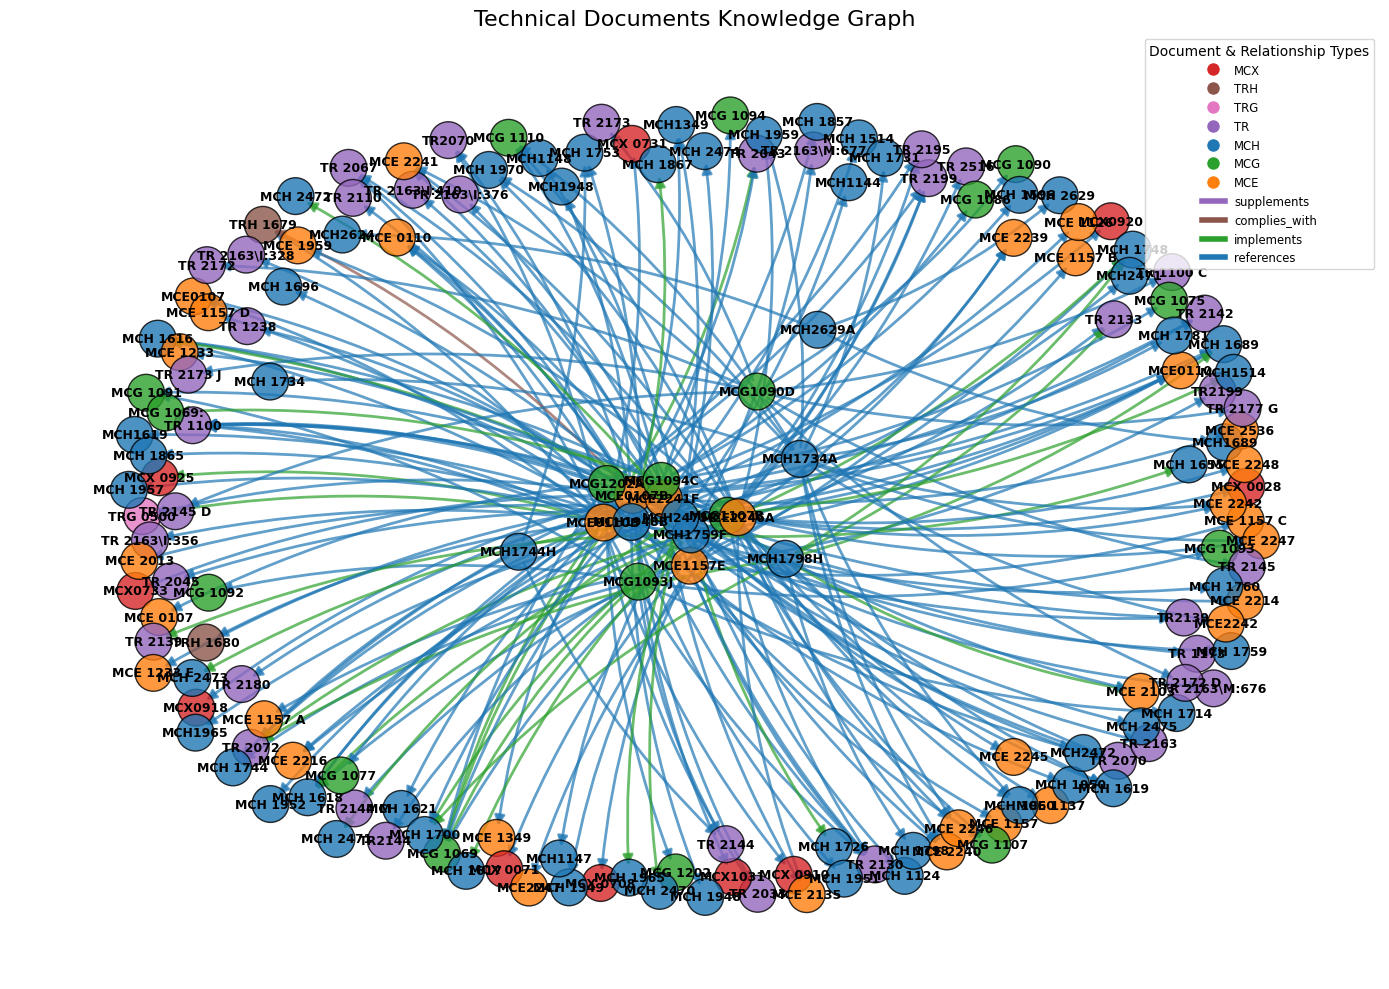

In [0]:
import networkx as nx
import matplotlib.pyplot as plt
import re

def visualize_tech_doc_relationships(all_relationships):
    """
    Create a knowledge graph visualization of technical document relationships.
    
    Args:
        all_relationships: Dictionary where keys are document IDs and 
                          values are lists of relationship dictionaries
    """
    # Create a directed graph
    G = nx.DiGraph()
    
    # Track unique relationship types for legend
    relationship_types = set()
    
    # Process all relationships to build the graph
    for source_doc, relationships in all_relationships.items():
        for rel in relationships:
            source = rel['source_doc']
            target = rel['referenced_doc']
            rel_type = rel['relationship_type']
            
            # Extract document types (e.g., 'MCE' from 'MCE0110B')
            source_prefix = re.match(r'^([A-Za-z]+)', source)
            source_type = source_prefix.group(1).upper() if source_prefix else 'OTHER'
            
            target_prefix = re.match(r'^([A-Za-z]+)', target)
            target_type = target_prefix.group(1).upper() if target_prefix else 'OTHER'
            
            # Add nodes with their document type attribute
            G.add_node(source, type=source_type)
            G.add_node(target, type=target_type)
            
            # Add edge with relationship type
            G.add_edge(source, target, relationship=rel_type)
            relationship_types.add(rel_type)
    
    # Define color schemes
    # Colors for document types
    doc_type_colors = {
        'MCE': '#ff7f0e',  # Orange
        'MCH': '#1f77b4',  # Blue
        'MCG': '#2ca02c',  # Green
        'MCX': '#d62728',  # Red
        'TR': '#9467bd',   # Purple
        'TRH': '#8c564b',  # Brown
        'TRG': '#e377c2',  # Pink
        'RE': '#bcbd22',   # Yellow
        'OTHER': '#7f7f7f'  # Gray
    }
    
    # Colors for relationship types
    rel_type_colors = {
        'references': '#1f77b4',      # Blue
        'supersedes': '#ff7f0e',      # Orange
        'implements': '#2ca02c',      # Green
        'version_of': '#d62728',      # Red
        'supplements': '#9467bd',     # Purple
        'complies_with': '#8c564b',   # Brown
        'DEFAULT': '#7f7f7f'          # Gray
    }
    
    # Get document types for all nodes
    node_types = nx.get_node_attributes(G, 'type')
    doc_types_in_graph = set(node_types.values())
    
    # Get colors for nodes based on document type
    node_colors = [doc_type_colors.get(node_types.get(node, 'OTHER'), 
                  doc_type_colors['OTHER']) for node in G.nodes()]
    
    # Get colors for edges based on relationship type
    edge_colors = []
    for u, v in G.edges():
        rel_type = G.edges[(u, v)].get('relationship', 'DEFAULT')
        edge_colors.append(rel_type_colors.get(rel_type, rel_type_colors['DEFAULT']))
    
    # Create figure for visualization
    plt.figure(figsize=(14, 10))
    
    # Create a layout for the graph
    pos = nx.spring_layout(G, k=0.3, iterations=50, seed=42)
    
    # Draw nodes
    nx.draw_networkx_nodes(
        G, pos, 
        node_size=700, 
        node_color=node_colors, 
        alpha=0.8,
        edgecolors='black'
    )
    
    # Draw edges
    nx.draw_networkx_edges(
        G, pos, 
        edge_color=edge_colors, 
        width=2, 
        alpha=0.7, 
        arrowsize=15,
        connectionstyle='arc3,rad=0.1'  # Curved edges for better visibility
    )
    
    # Draw node labels
    nx.draw_networkx_labels(
        G, pos, 
        font_size=9, 
        font_family='sans-serif',
        font_weight='bold'
    )
    
    # Create legend for document types
    doc_legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', 
                  markerfacecolor=doc_type_colors[doc_type], 
                  markersize=10, label=doc_type)
        for doc_type in doc_types_in_graph if doc_type in doc_type_colors
    ]
    
    # Create legend for relationship types
    rel_legend_elements = [
        plt.Line2D([0], [0], color=rel_type_colors.get(rel_type, rel_type_colors['DEFAULT']), 
                  lw=4, label=rel_type)
        for rel_type in relationship_types
    ]
    
    # Add legends to the plot
    plt.legend(
        handles=doc_legend_elements + rel_legend_elements,
        loc='upper right',
        title='Document & Relationship Types',
        fontsize='small'
    )
    
    # Remove axes
    plt.axis('off')
    
    # Add title
    plt.title('Technical Documents Knowledge Graph', fontsize=16)
    
    # Adjust layout to prevent clipping
    plt.tight_layout()
    
    # Display the graph
    plt.show()

visualize_tech_doc_relationships(all_relationships)

In [0]:
#Page rank google's algorithm https://www.geeksforgeeks.org/page-rank-algorithm-implementation/
#https://medium.com/biased-algorithms/pagerank-algorithm-explained-5f5c6a8c6696

import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import re
from collections import Counter, defaultdict

def analyze_knowledge_graph(all_relationships):
    """
    Generate comprehensive statistics about the technical document relationships.
    
    Args:
        all_relationships: Dictionary where keys are document IDs and 
                          values are lists of relationship dictionaries
    """
    # Create a directed graph (same as in visualization)
    G = nx.DiGraph()
    
    # Process all relationships to build the graph
    for source_doc, relationships in all_relationships.items():
        for rel in relationships:
            source = rel['source_doc']
            target = rel['referenced_doc']
            rel_type = rel['relationship_type']
            
            # Extract document types
            source_prefix = re.match(r'^([A-Za-z]+)', source)
            source_type = source_prefix.group(1).upper() if source_prefix else 'OTHER'
            
            target_prefix = re.match(r'^([A-Za-z]+)', target)
            target_type = target_prefix.group(1).upper() if target_prefix else 'OTHER'
            
            # Add nodes with their document type attribute
            G.add_node(source, type=source_type)
            G.add_node(target, type=target_type)
            
            # Add edge with relationship type
            G.add_edge(source, target, relationship=rel_type)
    
    # ----- BASIC GRAPH METRICS -----
    print("=" * 50)
    print("BASIC GRAPH METRICS")
    print("=" * 50)
    
    total_docs = G.number_of_nodes()
    total_relationships = G.number_of_edges()
    avg_relationships = total_relationships / total_docs if total_docs > 0 else 0
    
    print(f"Total Documents: {total_docs}")
    print(f"Total Relationships: {total_relationships}")
    print(f"Average Relationships per Document: {avg_relationships:.2f}")
    
    # ----- DOCUMENT TYPE ANALYSIS -----
    print("\n" + "=" * 50)
    print("DOCUMENT TYPE ANALYSIS")
    print("=" * 50)
    
    # Count document types
    doc_types = nx.get_node_attributes(G, 'type')
    doc_type_counts = Counter(doc_types.values())
    
    # Create a DataFrame for better visualization
    doc_type_df = pd.DataFrame({
        'Document Type': list(doc_type_counts.keys()),
        'Count': list(doc_type_counts.values())
    })
    doc_type_df = doc_type_df.sort_values('Count', ascending=False)
    
    print("Document Type Distribution:")
    print(doc_type_df)
    
    # Plot document type distribution
    plt.figure(figsize=(10, 6))
    plt.bar(doc_type_df['Document Type'], doc_type_df['Count'], color='skyblue')
    plt.title('Document Type Distribution')
    plt.xlabel('Document Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # ----- RELATIONSHIP TYPE ANALYSIS -----
    print("\n" + "=" * 50)
    print("RELATIONSHIP TYPE ANALYSIS")
    print("=" * 50)
    
    # Count relationship types
    rel_types = nx.get_edge_attributes(G, 'relationship')
    rel_type_counts = Counter(rel_types.values())
    
    # Create a DataFrame for better visualization
    rel_type_df = pd.DataFrame({
        'Relationship Type': list(rel_type_counts.keys()),
        'Count': list(rel_type_counts.values())
    })
    rel_type_df = rel_type_df.sort_values('Count', ascending=False)
    
    print("Relationship Type Distribution:")
    print(rel_type_df)
    
    # Plot relationship type distribution
    plt.figure(figsize=(10, 6))
    plt.bar(rel_type_df['Relationship Type'], rel_type_df['Count'], color='lightgreen')
    plt.title('Relationship Type Distribution')
    plt.xlabel('Relationship Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # ----- MOST CONNECTED DOCUMENTS -----
    print("\n" + "=" * 50)
    print("MOST CONNECTED DOCUMENTS")
    print("=" * 50)
    
    # Documents with most outgoing references
    out_degrees = dict(G.out_degree())
    top_out_degrees = sorted(out_degrees.items(), key=lambda x: x[1], reverse=True)[:10]
    
    print("\nTop 10 Documents with Most Outgoing References:")
    for doc, count in top_out_degrees:
        doc_type = doc_types.get(doc, 'Unknown')
        print(f"{doc} : {count} outgoing references")
    
    # Documents with most incoming references
    in_degrees = dict(G.in_degree())
    top_in_degrees = sorted(in_degrees.items(), key=lambda x: x[1], reverse=True)[:10]
    
    print("\nTop 10 Most Referenced Documents:")
    for doc, count in top_in_degrees:
        doc_type = doc_types.get(doc, 'Unknown')
        print(f"{doc}: {count} incoming references")
    
    # Combined degree (total connections)
    combined_degrees = {node: G.in_degree(node) + G.out_degree(node) for node in G.nodes()}
    top_combined = sorted(combined_degrees.items(), key=lambda x: x[1], reverse=True)[:10]
    '''
    print("\nTop 10 Most Connected Documents (In + Out):")
    for doc, count in top_combined:
        doc_type = doc_types.get(doc, 'Unknown')
        print(f"{doc}: {count} total connections")
    '''  
    # PageRank (approximates importance)
    pagerank = nx.pagerank(G, alpha=0.85)
    top_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]
    
    print("\nTop 10 Most Important Documents (PageRank):")
    for doc, score in top_pagerank:
        doc_type = doc_types.get(doc, 'Unknown')
        print(f"{doc} ({doc_type}): {score:.4f}")
    
    # ----- RELATIONSHIP PATTERNS BY DOCUMENT TYPE -----
    print("\n" + "=" * 50)
    print("RELATIONSHIP PATTERNS BY DOCUMENT TYPE")
    print("=" * 50)
    
    # Analyze which document types reference which other types
    doc_type_relationships = defaultdict(Counter)
    
    for source, target in G.edges():
        source_type = doc_types.get(source, 'Unknown')
        target_type = doc_types.get(target, 'Unknown')
        doc_type_relationships[source_type][target_type] += 1
    
    print("\nRelationship Patterns Between Document Types:")
    for source_type, target_counters in doc_type_relationships.items():
        print(f"\n{source_type} documents reference:")
        for target_type, count in target_counters.most_common():
            print(f"  - {target_type} documents: {count} times")
    
    
    # Return the graph for potential further analysis
    return G

BASIC GRAPH METRICS
Total Documents: 168
Total Relationships: 223
Average Relationships per Document: 1.33

DOCUMENT TYPE ANALYSIS
Document Type Distribution:
  Document Type  Count
1           MCH     62
2            TR     39
0           MCE     36
5           MCG     18
4           MCX     10
3           TRH      2
6           TRG      1


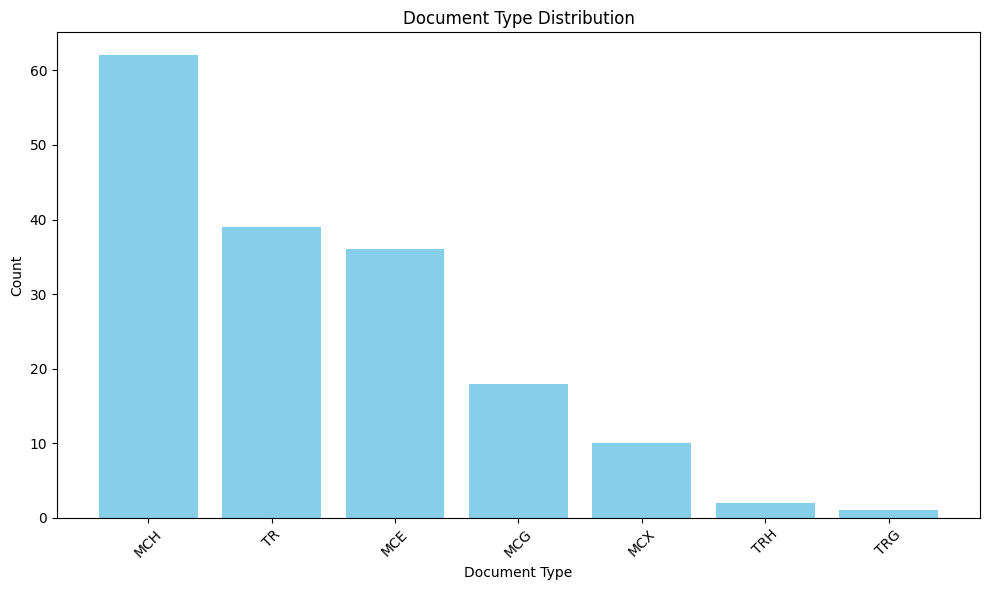


RELATIONSHIP TYPE ANALYSIS
Relationship Type Distribution:
  Relationship Type  Count
0        references    193
1        implements     29
2     complies_with      1


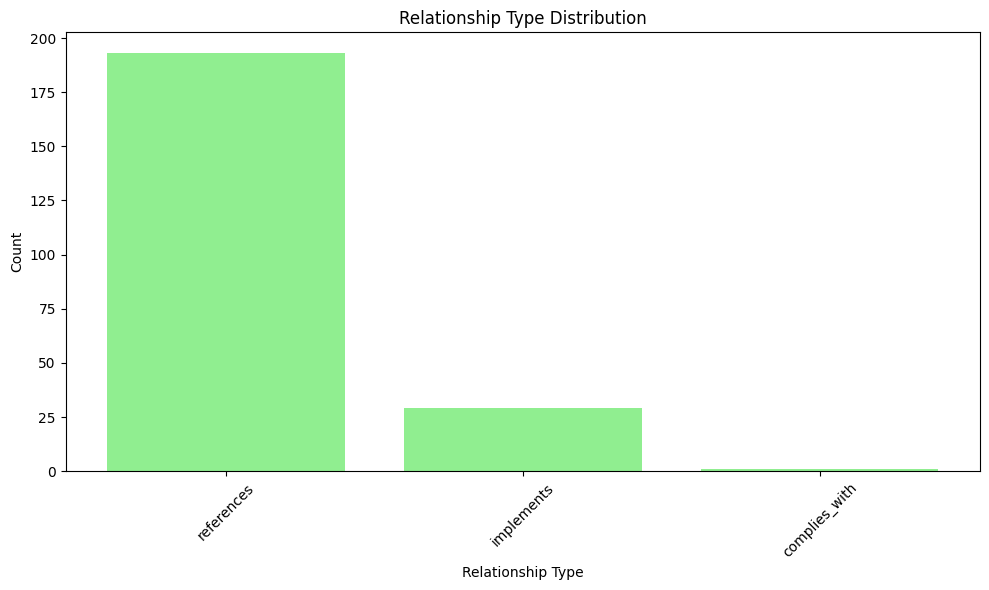


MOST CONNECTED DOCUMENTS

Top 10 Documents with Most Outgoing References:
MCE0107B : 27 outgoing references
MCE0110B : 21 outgoing references
MCH1759F : 20 outgoing references
MCE2246A : 17 outgoing references
MCG1107B : 15 outgoing references
MCH1734A : 15 outgoing references
MCH2475C : 15 outgoing references
MCE1157E : 14 outgoing references
MCE2241F : 14 outgoing references
MCG1093J : 11 outgoing references

Top 10 Most Referenced Documents:
TR 1100: 6 incoming references
MCG 1069: 6 incoming references
TR 2130: 5 incoming references
MCH 1618: 4 incoming references
TR 2072: 4 incoming references
MCH 1689: 4 incoming references
MCH 1616: 4 incoming references
TR 2067: 3 incoming references
TR 2070: 3 incoming references
MCE 0110: 3 incoming references

Top 10 Most Important Documents (PageRank):
MCG 1069 (MCG): 0.0076
TR 2144 (TR): 0.0075
MCH 1744 (MCH): 0.0075
MCH 1753 (MCH): 0.0075
TR 1100 (TR): 0.0074
MCH 1616 (MCH): 0.0072
MCH 2629 (MCH): 0.0070
MCH2624 (MCH): 0.0070
MCH1689 (MC

In [0]:
G = analyze_knowledge_graph(all_relationships)

In [0]:
def reconcile_relationship_stats(all_relationships):
    """
    Reconciles the original relationship counts with graph structure and
    provides clearer insights into relationship data.
    """
    print("=" * 60)
    print("RELATIONSHIP RECONCILIATION ANALYSIS")
    print("=" * 60)
    
    # Count total mentions vs unique relationships
    total_mentions = 0
    unique_relationships = set()
    
    # Document to document-type mapping
    doc_types = {}
    
    # Track relationship frequencies
    relationship_types = {}
    
    for source_doc, relationships in all_relationships.items():
        # Extract source document type
        source_match = re.match(r'^([A-Za-z]+)', source_doc)
        source_type = source_match.group(1).upper() if source_match else 'OTHER'
        doc_types[source_doc] = source_type
        
        unique_targets_by_doc = set()
        
        for rel in relationships:
            total_mentions += 1
            target_doc = rel['referenced_doc']
            rel_type = rel['relationship_type']
            
            # Extract target document type
            if target_doc not in doc_types:
                target_match = re.match(r'^([A-Za-z]+)', target_doc) 
                target_type = target_match.group(1).upper() if target_match else 'OTHER'
                doc_types[target_doc] = target_type
            
            # Track unique relationship by source-target pair
            rel_key = (source_doc, target_doc)
            unique_relationships.add(rel_key)
            unique_targets_by_doc.add(target_doc)
            
            # Count relationship types
            if rel_type not in relationship_types:
                relationship_types[rel_type] = 0
            relationship_types[rel_type] += 1
    
    print(f"\nTotal Relationship Mentions: {total_mentions}")
    print(f"Unique Document-to-Document Relationships: {len(unique_relationships)}")
    print(f"Relationship Mention Ratio: {total_mentions/len(unique_relationships):.2f}x")
    
    print("\nWhy the difference?")
    print("1. The original statistics count all mentions of relationships")
    print("2. The graph visualization shows unique document-to-document connections")
    print("3. Multiple mentions of the same relationship in a document are counted only once in the graph")
    
    # Find documents with most duplicate mentions
    print("\n" + "=" * 60)
    print("DOCUMENTS WITH MOST RELATIONSHIP MENTION DUPLICATES")
    print("=" * 60)
    
    duplication_by_doc = {}
    
    for source_doc, relationships in all_relationships.items():
        target_count = {}
        for rel in relationships:
            target = rel['referenced_doc']
            if target not in target_count:
                target_count[target] = 0
            target_count[target] += 1
        
        # Count total mentions and unique targets
        total = len(relationships)
        unique = len(target_count)
        
        # Calculate duplication ratio
        if unique > 0:
            duplication_ratio = total / unique
        else:
            duplication_ratio = 0
            
        duplication_by_doc[source_doc] = {
            'total_mentions': total,
            'unique_targets': unique,
            'duplication_ratio': duplication_ratio,
            'most_repeated': sorted(target_count.items(), key=lambda x: x[1], reverse=True)[:3]
        }
    
    # Display top documents by duplication ratio
    top_duplicators = sorted(duplication_by_doc.items(), 
                             key=lambda x: x[1]['duplication_ratio'], 
                             reverse=True)[:10]
    
    print("\nTop 10 Documents with Highest Mention Duplication:")
    for doc, stats in top_duplicators:
        print(f"\n{doc} ({doc_types.get(doc, 'Unknown')}):")
        print(f"  Total relationship mentions: {stats['total_mentions']}")
        print(f"  Unique documents referenced: {stats['unique_targets']}")
        print(f"  Duplication ratio: {stats['duplication_ratio']:.2f}x")
        
        if stats['most_repeated']:
            print("  Most frequently mentioned documents:")
            for target, count in stats['most_repeated']:
                print(f"    - {target}: mentioned {count} times")
    
    print("\n" + "=" * 60)
    print("RELATIONSHIP TYPE DISTRIBUTION")
    print("=" * 60)
    
    rel_type_df = pd.DataFrame({
        'Relationship Type': list(relationship_types.keys()),
        'Count': list(relationship_types.values()),
        'Percentage': [count/total_mentions*100 for count in relationship_types.values()]
    })
    rel_type_df = rel_type_df.sort_values('Count', ascending=False)
    
    print("\nDistribution of Relationship Types:")
    for _, row in rel_type_df.iterrows():
        print(f"{row['Relationship Type']}: {row['Count']} mentions ({row['Percentage']:.1f}%)")
    
    return {
        'total_mentions': total_mentions,
        'unique_relationships': len(unique_relationships),
        'duplication_ratio': total_mentions/len(unique_relationships),
        'duplication_by_doc': duplication_by_doc,
        'relationship_types': relationship_types
    }

In [0]:
# First run the original graph analysis
#G = analyze_knowledge_graph(all_relationships)

# Then run the reconciliation analysis
reconciliation_data = reconcile_relationship_stats(all_relationships)

RELATIONSHIP RECONCILIATION ANALYSIS

Total Relationship Mentions: 993
Unique Document-to-Document Relationships: 223
Relationship Mention Ratio: 4.45x

Why the difference?
1. The original statistics count all mentions of relationships
2. The graph visualization shows unique document-to-document connections
3. Multiple mentions of the same relationship in a document are counted only once in the graph

DOCUMENTS WITH MOST RELATIONSHIP MENTION DUPLICATES

Top 10 Documents with Highest Mention Duplication:

MCG1107B (MCG):
  Total relationship mentions: 211
  Unique documents referenced: 15
  Duplication ratio: 14.07x
  Most frequently mentioned documents:
    - TR 2199: mentioned 135 times
    - TR 2130: mentioned 16 times
    - TR 2067: mentioned 13 times

MCH1798H (MCH):
  Total relationship mentions: 68
  Unique documents referenced: 9
  Duplication ratio: 7.56x
  Most frequently mentioned documents:
    - MCH 1748: mentioned 36 times
    - MCH 1689: mentioned 14 times
    - MCE 2103: